In [147]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from src.utils import *
from src.utils_TP5 import *
from src.knn_validation import knn_simple_validation
data = pd.read_csv('../dataset/data_cleaned.csv')

In [148]:
df_ = data.drop('Diagnosis', axis=1)

y = data["Diagnosis"]
x = df_.copy()

scaler_s = StandardScaler()
scaler_m = MinMaxScaler()

x = x - x.mean()
x_normalized = pd.DataFrame(scaler_m.fit_transform(x), columns=x.columns)
x_standardized = pd.DataFrame(scaler_s.fit_transform(x), columns=x.columns)

x = x_normalized

Détermine le nombre de voisins optimal

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X = x
y = label_encoder.fit_transform(y)

# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500, 100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(X, y)
print(search.best_params_)

{'n_neighbors': 7}


Visualisation

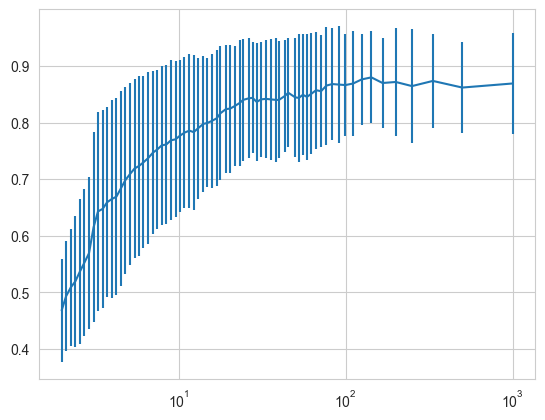

In [150]:
df = pd.DataFrame(
(
dict(n_neighbors=d["n_neighbors"], error=e, std=s)
for d, e, s in zip(
search.cv_results_["params"],
search.cv_results_["mean_test_score"],
search.cv_results_["std_test_score"],
)
)
)
n = 9/10 * len(y)
plt.errorbar(n/df["n_neighbors"], df["error"], yerr=df["std"])
plt.xscale("log")
plt.show()

Estimation des performances

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.66)
# De 1 à 500 voisins (exclu), échelle logarithmique
n_neighbors_list = np.unique(np.round(np.geomspace(1, 500,100)).astype(int))
param_grid = {"n_neighbors": n_neighbors_list}
cls = KNeighborsClassifier()
search = GridSearchCV(cls, param_grid, scoring="accuracy", cv=10)
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
accuracy_score(y_pred, y_test)

0.8620689655172413

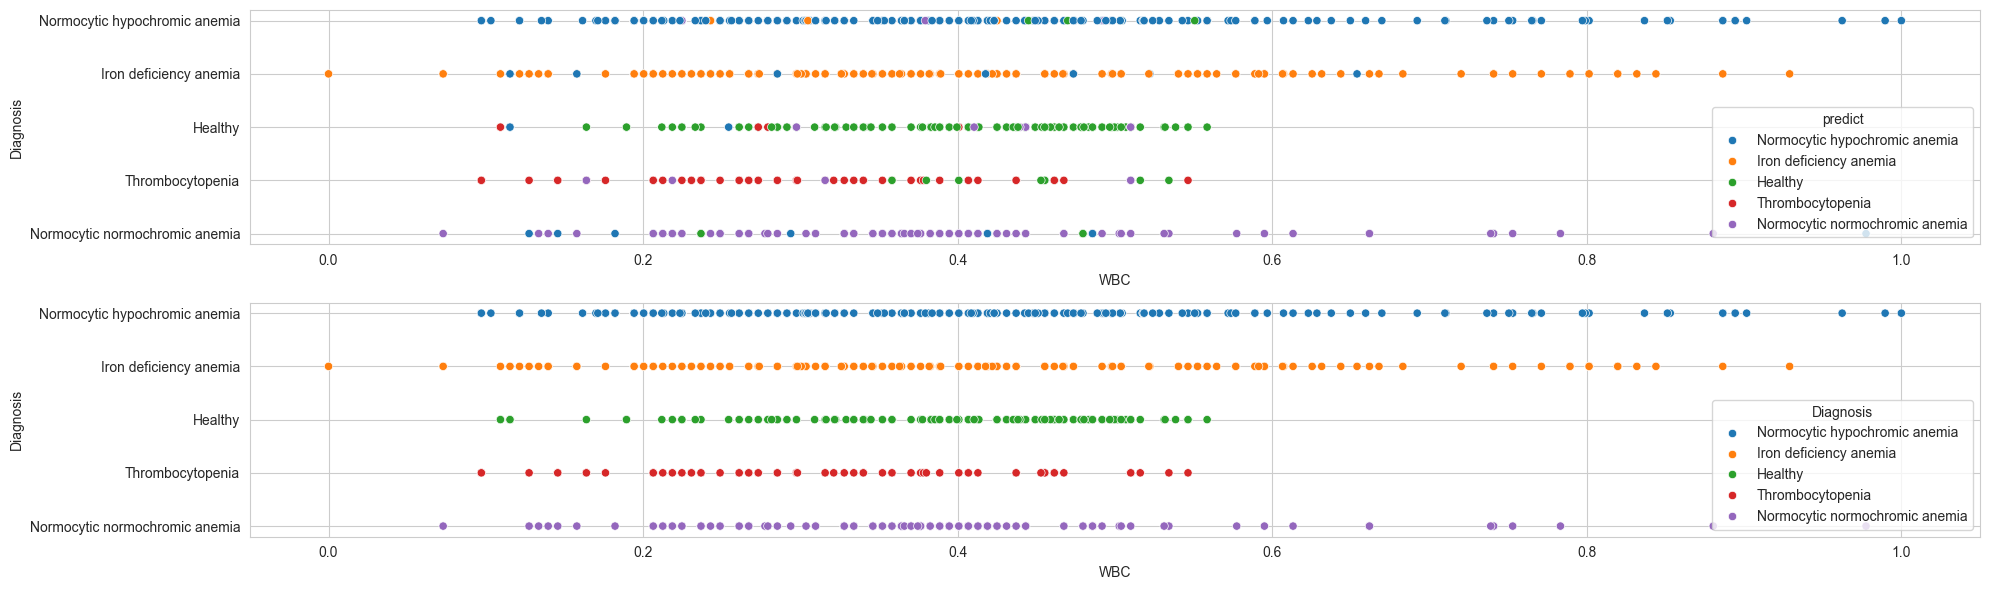

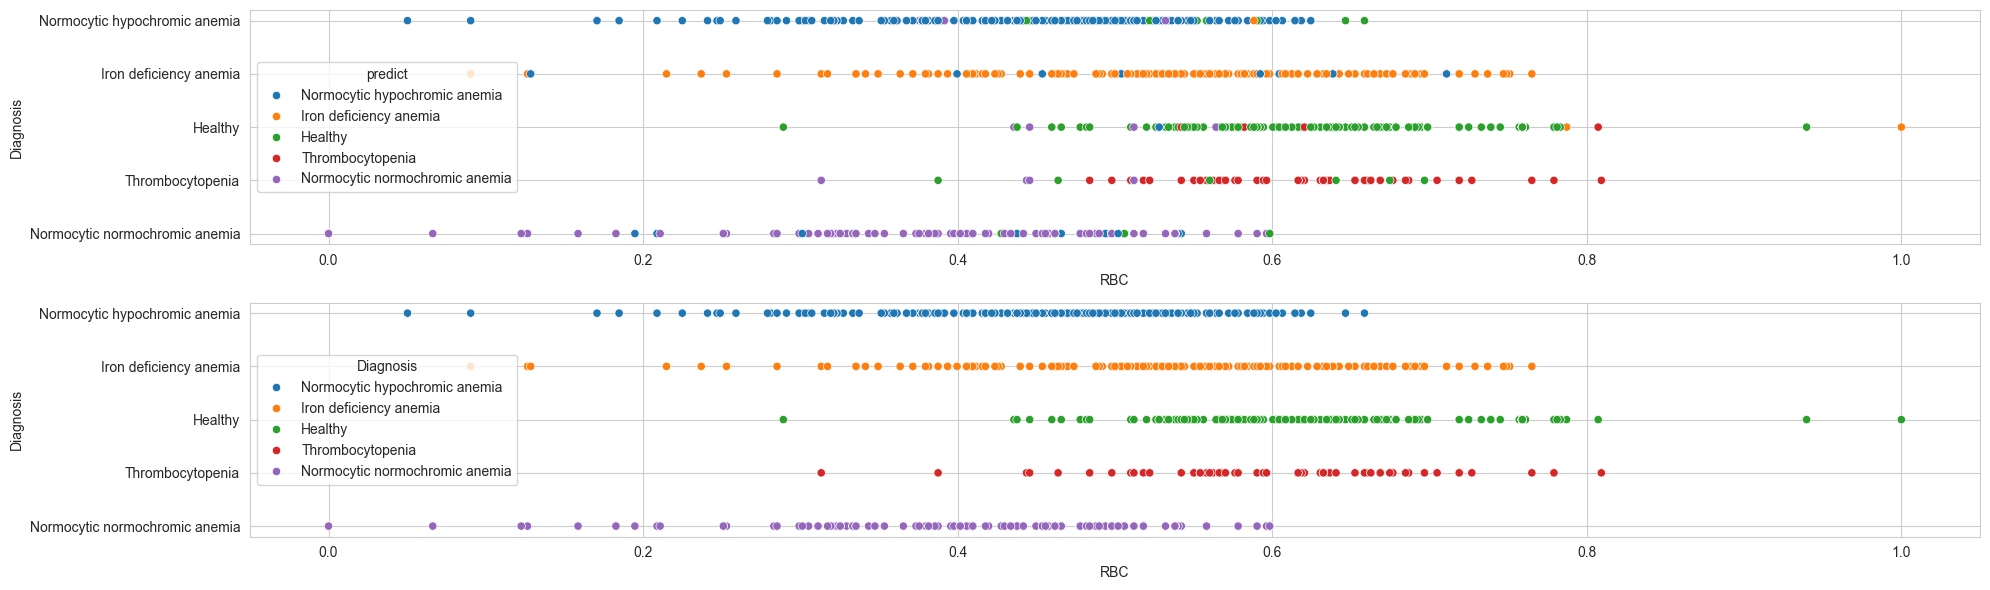

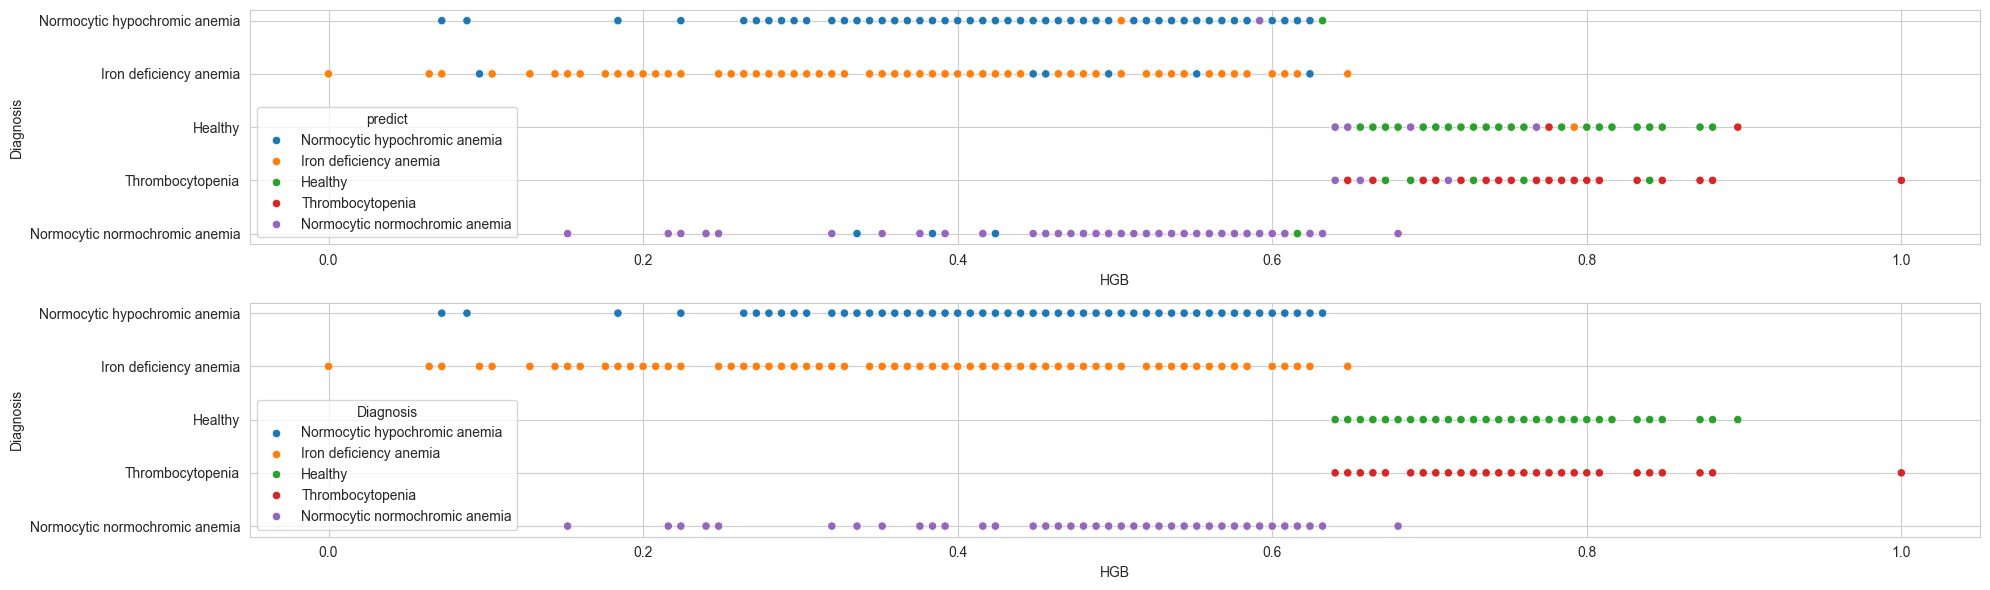

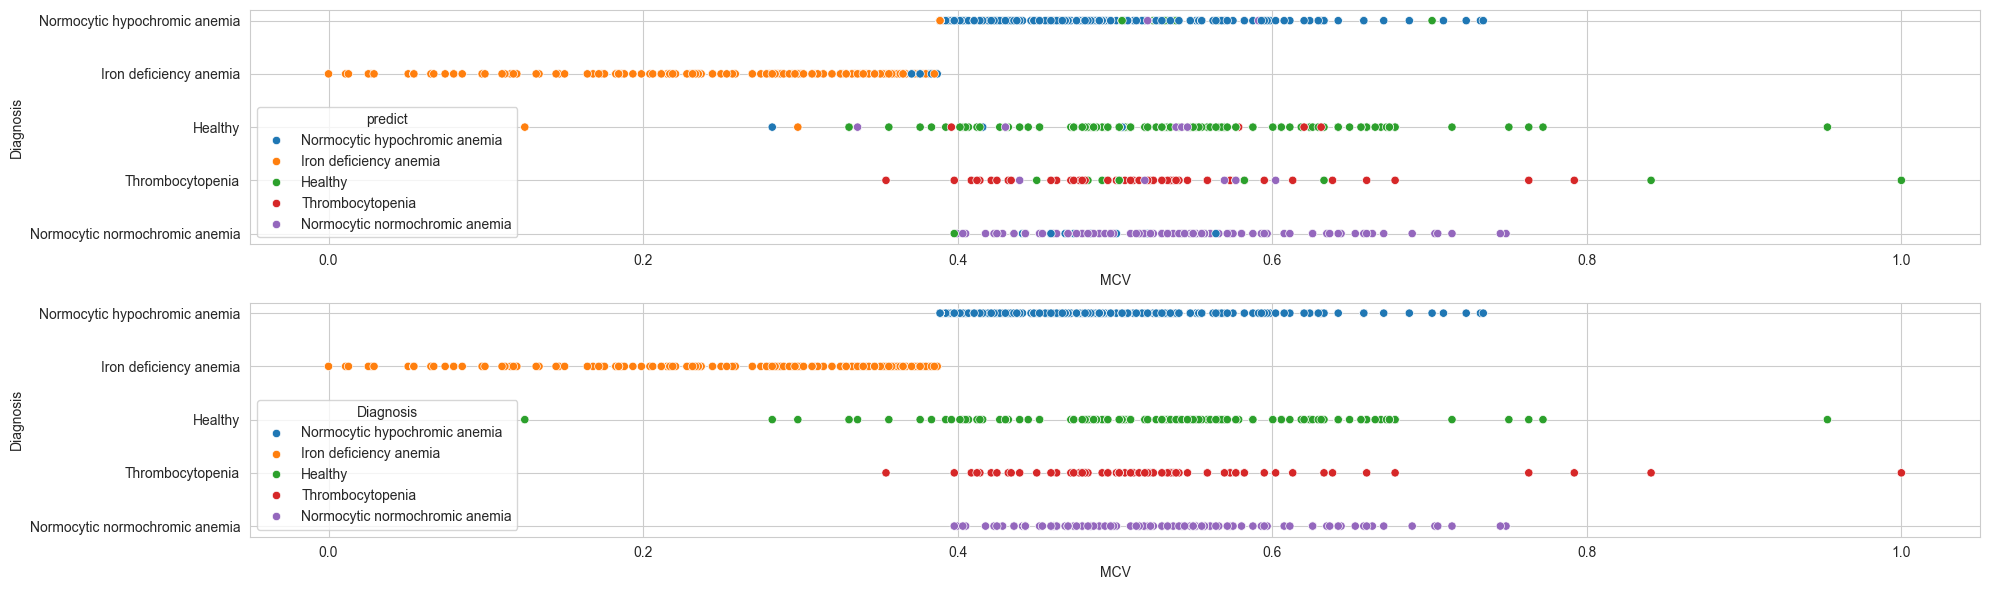

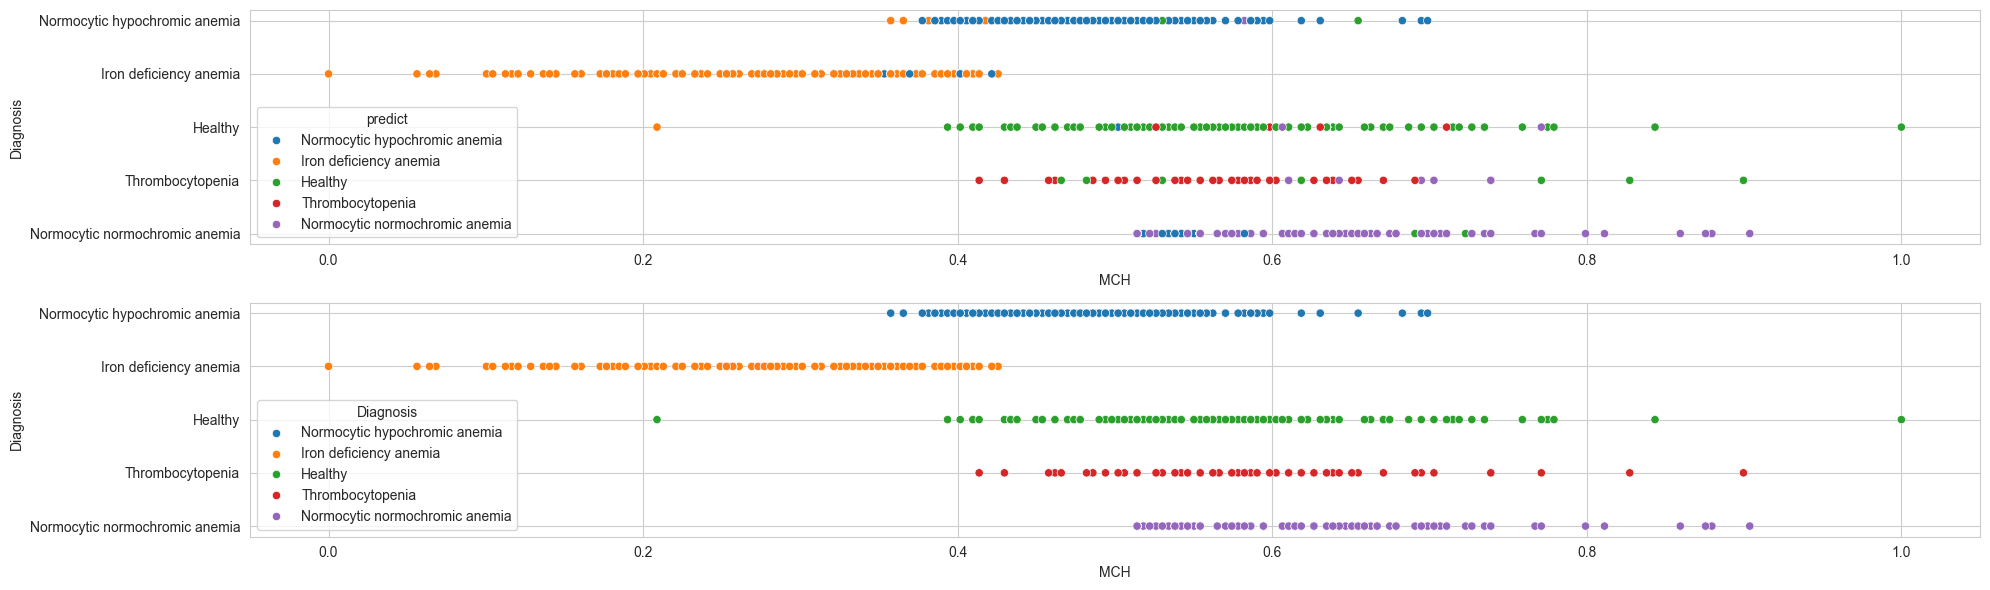

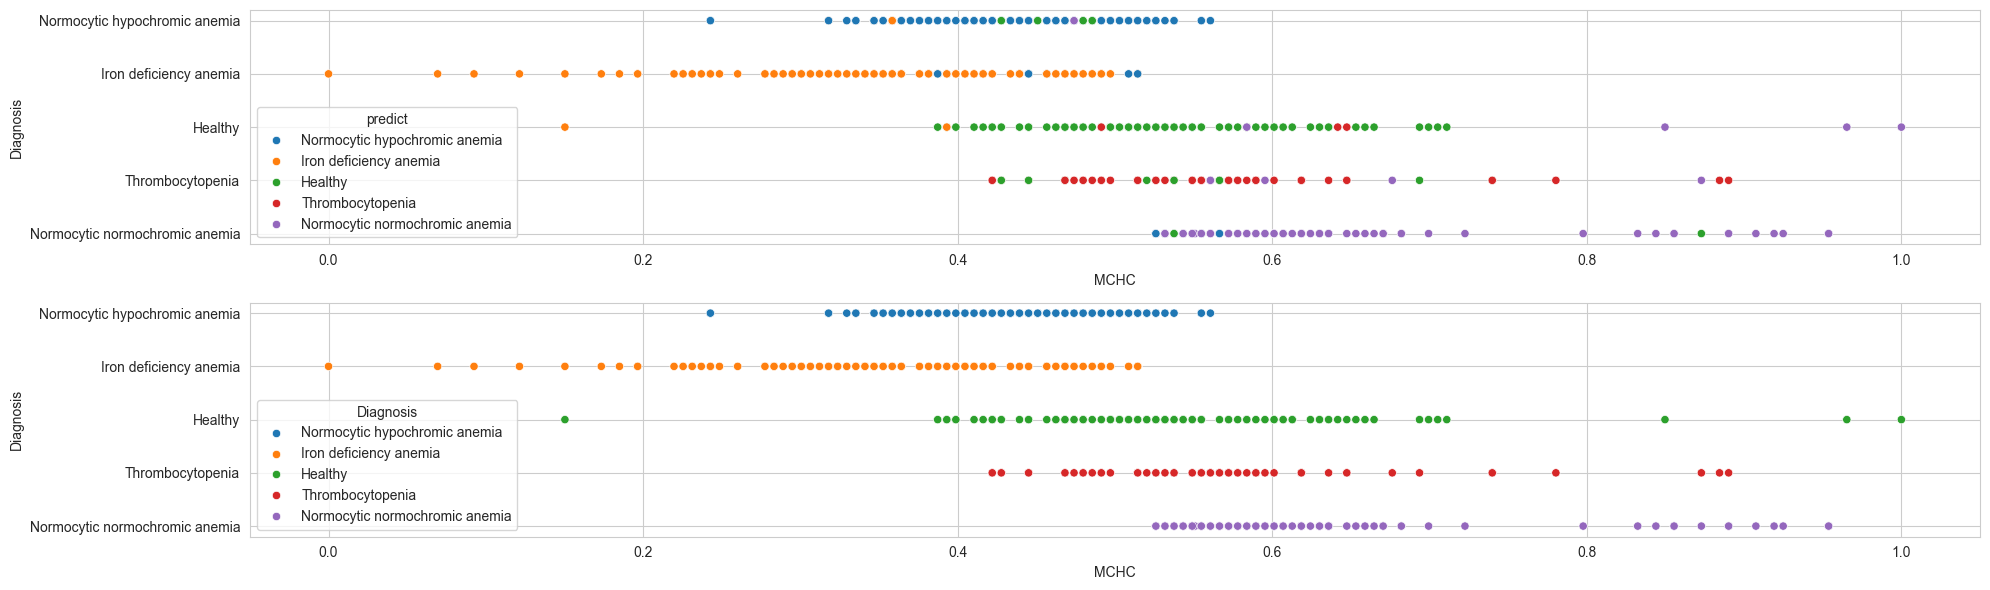

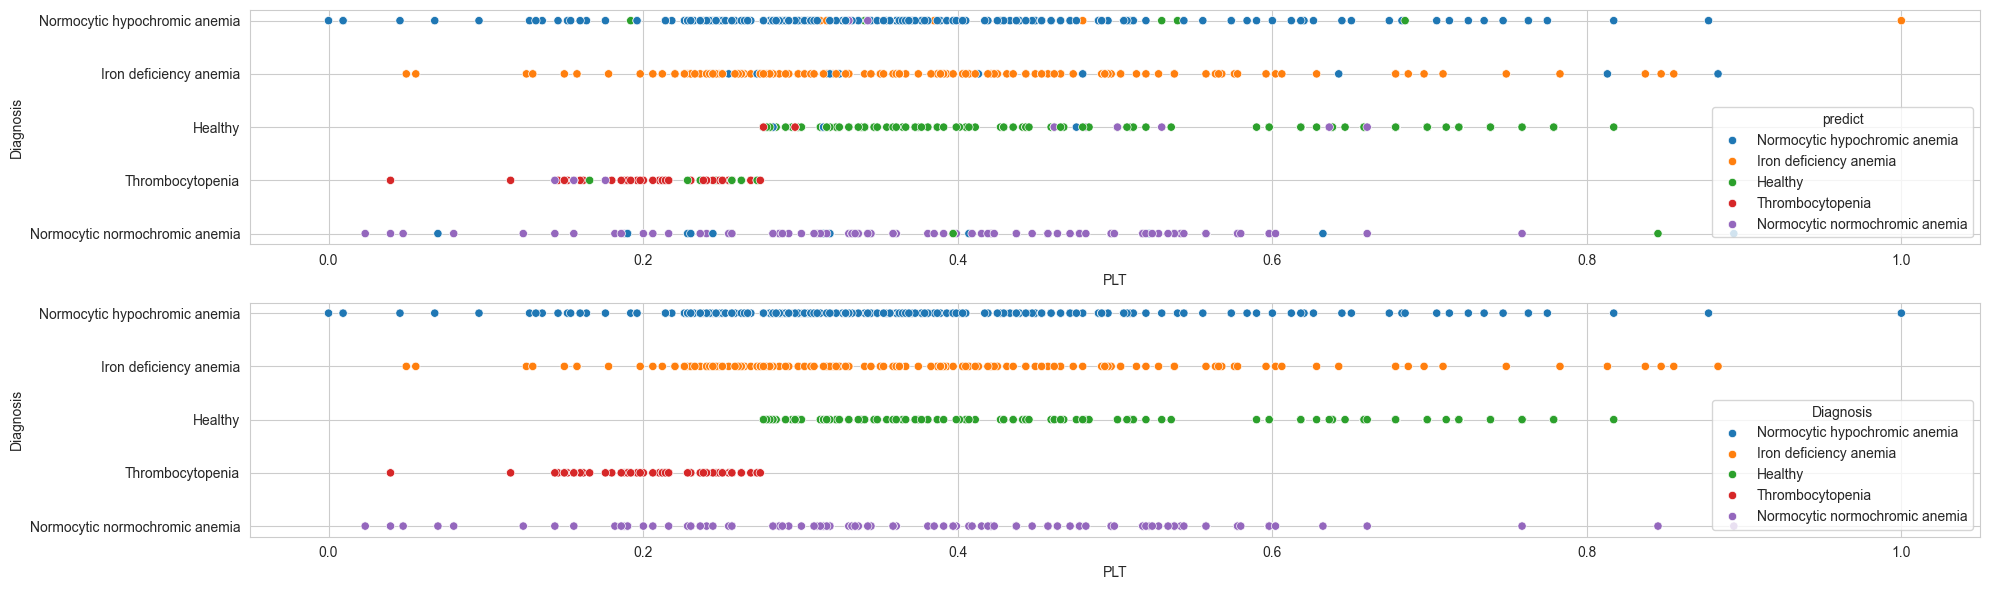

In [152]:
cls = KNeighborsClassifier(n_neighbors=search.best_params_['n_neighbors'])  # Could be change (1, 2, ...)
cls.fit(x, data["Diagnosis"])

labels = cls.predict(x)
x["predict"] = labels
x["Diagnosis"] = data["Diagnosis"]

for var in x.columns[:-2]:  # iterate over columns except "predict" and "Diagnosis"
    fig, axes = plt.subplots(2, 1, figsize=(20, 6))

    # Scatter plot
    sns.scatterplot(data=x, x=var, y="Diagnosis", hue="predict", ax=axes[0])
    sns.scatterplot(data=x, x=var, y="Diagnosis", hue="Diagnosis", ax=axes[1])

    plt.tight_layout()
    plt.show()